In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
from math import sqrt
from sklearn.model_selection import train_test_split

np.random.seed(123)

%matplotlib inline

Load data

In [2]:
#data_root = 'data/train_1000_10'
#data_root = 'data/train_700_28'
data_root = 'data/train_1000_28'

truth_file = f'{data_root}/truth.dsv'

In [3]:
# load data
dataset = np.genfromtxt(truth_file, delimiter=':', dtype=np.dtype('<U12'), encoding='utf-8')
files, labels = np.split(dataset, 2, 1)
# flatten to a single vector
labels = labels.flatten()
files = files.flatten()

print(f'Labels shape: {labels.shape}')
print(f'Files shape: {files.shape}')

Labels shape: (1000,)
Files shape: (1000,)


In [4]:
def load_img(file_name):
    # open the image
    img = Image.open(file_name)
    # convert to grayscale to have a single dimension
    gray_scale = ImageOps.grayscale(img)
    # convert to numpy
    arr = np.asarray(gray_scale, dtype='float64')
    # convert to a single vector
    return arr.flatten()

In [5]:
# load image as a single vector
images = np.array([load_img(f'{data_root}/{x}') for x in files])

print(f'Images shape: {images.shape}')
samples, image_pixels = images.shape
print(f'Samples: {samples}x')
# we assume that the images are squares
image_size = int(sqrt(image_pixels))
print(f'Image size: {image_size}px')

Images shape: (1000, 784)
Samples: 1000x
Image size: 28px


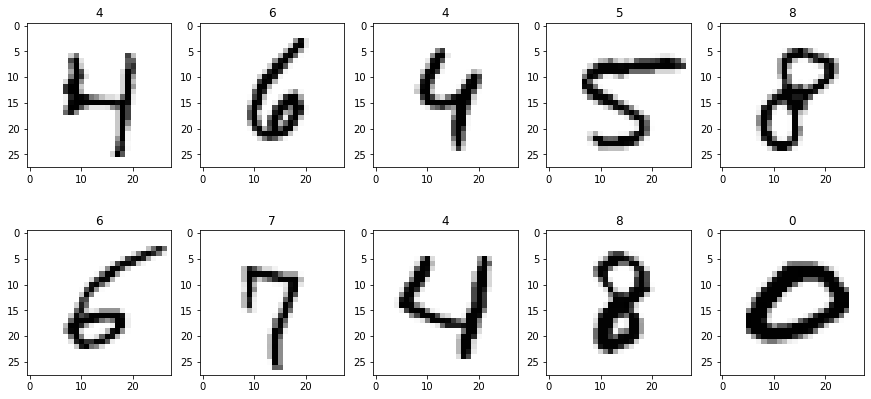

In [6]:
to_plot = 10
per_row = 5
fig = plt.figure(figsize=(15, 7))
for i in range(to_plot):
    ax = fig.add_subplot(int(to_plot / per_row), per_row, i+1)

    sample_idx = np.random.randint(0, len(images))
    img = images[sample_idx]
    img_size = int(sqrt(img.shape[0]))
    
    ax.title.set_text(labels[sample_idx])
    
    plt.imshow(img.reshape((img_size, img_size)), cmap='gray')
    
plt.show()

In [8]:
class kNN:
    """
    Classic kNN where as the distance vector is used euclidean distance.
    """

    def __init__(self, values, labels):
        self.values = values
        self.labels = labels

    def __euclidean_distance(self, X):
        # get vector of euclidean instances
        return np.array([np.sqrt(np.sum((self.values - X[i]) ** 2, axis=1)) for i in range(len(X))])

    def predict(self, X, k):
        # compute euclid distances from the training data
        dists = self.__euclidean_distance(X)
        # select K closest data points
        knn = np.argsort(dists)[:, :k]
        # get the labels for the selected training points
        y_knn = self.labels[knn]
        # select labels which are most frequent in the neighborhood of the given data
        return [max(y_knn[i], key=list(y_knn[i]).count) for i in range(len(X))]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (750, 784)
y_train shape: (750,)
X_test shape: (250, 784)
y_test shape: (250,)


In [10]:
X_train.shape
len

<function len(obj, /)>

In [11]:
knn = kNN(X_train, y_train)

print("Testing one datapoint, k=1")
print(f"Predicted label: {knn.predict(X_test[0:1], k=1)}")
print(f"True label: {y_test[0:1]}")
print()
print("Testing one datapoint, k=5")
print(f"Predicted label: {knn.predict(X_test[20:21], k=5)}")
print(f"True label: {y_test[20:21]}")
print()
print("Testing 10 datapoint, k=1")
print(f"Predicted labels: {knn.predict(X_test[5:15], k=1)}")
print(f"True labels: {y_test[5:15]}")
print()
print("Testing 10 datapoint, k=4")
print(f"Predicted labels: {knn.predict(X_test[5:15], k=5)}")
print(f"True labels: {y_test[5:15]}")
print()

Testing one datapoint, k=1
Predicted label: ['7']
True label: ['7']

Testing one datapoint, k=5
Predicted label: ['1']
True label: ['1']

Testing 10 datapoint, k=1
Predicted labels: ['5', '7', '8', '7', '0', '9', '1', '7', '1', '1']
True labels: ['5' '7' '3' '7' '0' '9' '1' '7' '1' '1']

Testing 10 datapoint, k=4
Predicted labels: ['5', '7', '8', '7', '0', '9', '1', '7', '1', '1']
True labels: ['5' '7' '3' '7' '0' '9' '1' '7' '1' '1']



In [12]:
def get_precision(predicted, labels):
    return np.sum(predicted == labels) / len(predicted) * 100

In [13]:
def evaluate_k(k):
    predicted = knn.predict(X_test, k)
    print(f"Test accuracy with k = {k}: {get_precision(predicted, y_test)}")

In [14]:
for k in range(1, 10):
    evaluate_k(k)

Test accuracy with k = 1: 86.4
Test accuracy with k = 2: 86.4
Test accuracy with k = 3: 86.4
Test accuracy with k = 4: 86.4
Test accuracy with k = 5: 86.0
Test accuracy with k = 6: 85.6
Test accuracy with k = 7: 85.6
Test accuracy with k = 8: 85.2
Test accuracy with k = 9: 84.8
